# `DSML_WS_07` - Regression 1

Please work on the following tasks **before** the seventh workshop session.

*Note*: Because of the double workshop two weeks ago and the scheduling change last week, there are four tasks to prepare for this workshop.

## 1. Visualizing the Iris dataset

Two weeks ago, we learned how to visualize data using Matplotlib and Seaborn. Let us put what we learned together using a familiar dataset: the iris flower dataset.

Complete the following steps:
1. Read in the `iris.csv` dataset and drop missing data.
2. Create a simple scatter plot of the "number" and "Petal.Width" features. Annotate your graph appropriately.
3. You may have noticed some striking patterns emerging from this first plot. So let's dig deeper. Plot Petal.Width vs. Petal.Length on a scatter plot. Colour-code the different species. Hint: You could run `plt.scatter()` for each species and use different colors to differentiate between the species.
4. Finally, let us plot a histogram - a common plot type in data science - which shows the number of occurences of a given observation in the sample. **Use the Seaborn library for this**. Plot the Petal.Width feature. Hint: Using the `data=`, `x=` and `hue=` parameters of the `sns.histplot()` function can be very helpful here.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
import datetime

In [62]:
# Task 1: your code here
df = sns.load_dataset("iris")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


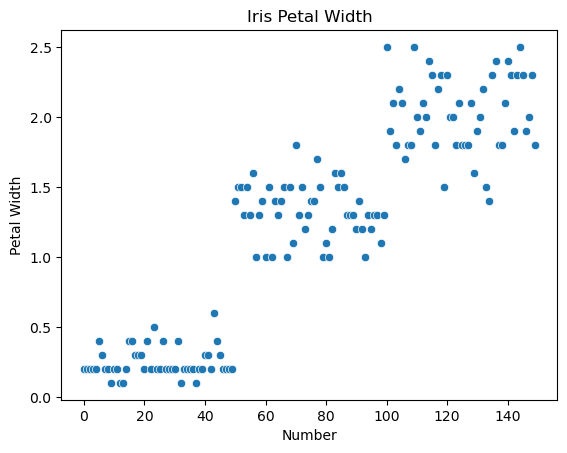

In [63]:
# Task 2: your code here
fig, ax = plt.subplots()
sns.scatterplot(data=df, x = df.index, y="petal_width")
ax.set_title("Iris Petal Width")
ax.set_xlabel("Number")
ax.set_ylabel("Petal Width")
plt.show()

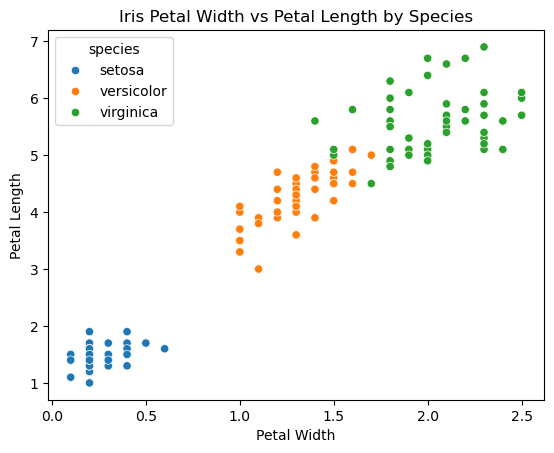

In [64]:
# Task 3: your code here
fig, ax = plt.subplots()
sns.scatterplot(data=df, x = "petal_width", y="petal_length", hue="species")
ax.set_title("Iris Petal Width vs Petal Length by Species")
ax.set_xlabel("Petal Width")
ax.set_ylabel("Petal Length")
plt.show()

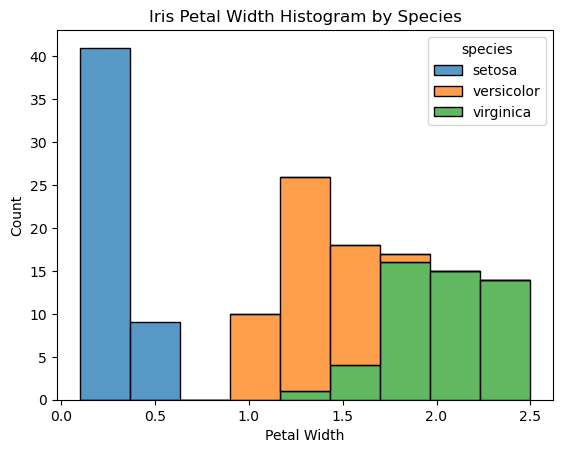

In [65]:
# Task 4: your code here
fig, ax = plt.subplots()
sns.histplot(data=df, x="petal_width", hue="species", multiple='stack')
ax.set_title("Iris Petal Width Histogram by Species")
ax.set_xlabel("Petal Width")
ax.set_ylabel("Count")
plt.show()

## 2. Analyzing speed limit violations in Cologne

Two weeks ago, we really got into hands-on data science using carsharing availability data. Let's put what we learned into practice using data on speed limit violations from August 2022 (the provided datasets are based on this publicly available dataset accessible via [this link](https://offenedaten-koeln.de/dataset/geschwindigkeitsueberwachung-koeln)). The following information are available:
- *date*: date of the violation
- *time*: time of the violation 
- *speed*: speed in km/h
- *excess_speed*: speed above the allowed speed limit in km/h
- *location_id*: identifier of the speed control location

Additionally, we have a dataset with further information on the speed control, including:
- *location_id*: identifier of the speed control location
- *speed_limit*: speed limit in km/h
- *district*: abbreviation for city district of speed control location
- *street*: street name of speed control location

Complete the following steps:
1. Import pandas and load the speeding violations dataset (speeding_cgn_2018_08.csv). Is there missing data? How many violations were there in total during the selected period?
2. Let's properly format the *date* and *time* columns. Combine them into one column and transform them to datetime format. Extract the hour and day of week, and add them as new columns to the dataframe. Hint: make sure that you specify the correct format when transforming to datetime.
3. We want to add the information on the speed control locations contained in *control_locations.csv*. We only want to analyze those violations at control locations for which we have data in control_locations.csv. Load *control_locations.csv* and perform the appropriate merge, so that all relevant information are in one dataframe. Hint: think about the correct setting for the how-parameter in merge.
4. Create two plots: first, show boxplots of the number of speeding violations by day of week. Second, show boxplots of the number of speeding violations by hour of day.

Feel free to use your knowledge to conduct further analyses on the dataset!

In [66]:
# your code here
speed = pd.read_csv("speeding_cgn_2018_08.csv")
speed.info()
# No missing values, all 57104 rows are speed violations

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57014 entries, 0 to 57013
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          57014 non-null  object
 1   time          57014 non-null  object
 2   speed         57014 non-null  int64 
 3   excess_speed  57014 non-null  int64 
 4   location_id   57014 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


In [67]:
# Task2:
speed["date"] = pd.to_datetime(speed["date"], format="%d/%m/%y")
speed["time"] = pd.to_datetime(speed["time"], format="%H:%M:%S").dt.time
speed["date_time"] = pd.to_datetime(speed["date"].astype(str) + " " + speed["time"].astype(str),
                                      format="%Y-%m-%d %H:%M:%S")
speed["hour"] = speed["date_time"].dt.hour
speed["weekday"] = speed["date_time"].dt.day_name()
speed.drop(columns=["date", "time"], inplace=True)
speed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57014 entries, 0 to 57013
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   speed         57014 non-null  int64         
 1   excess_speed  57014 non-null  int64         
 2   location_id   57014 non-null  int64         
 3   date_time     57014 non-null  datetime64[ns]
 4   hour          57014 non-null  int32         
 5   weekday       57014 non-null  object        
dtypes: datetime64[ns](1), int32(1), int64(3), object(1)
memory usage: 2.4+ MB


In [68]:
# Task3:
loc = pd.read_csv("control_locations.csv")
speed = speed.merge(loc, how="inner")
speed.head()

,speed,excess_speed,location_id,date_time,hour,weekday,speed_limit,district,street
0,63,10,7,2022-08-01 00:03:49,0,Monday,50,07 Innere Kanalstraße,Höhe Escher Straße / Hornstr.
1,74,11,5,2022-08-01 00:04:48,0,Monday,60,05 Zoobrücke,Höhe Amsterdamer Straße
2,72,9,972,2022-08-01 00:10:00,0,Monday,60,"972 BAB 1, km 407,075 (MQ1)",Rheinbrücke in Höhe Rheinauen
3,86,23,972,2022-08-01 00:10:49,0,Monday,60,"972 BAB 1, km 407,075 (MQ1)",Rheinbrücke in Höhe Rheinauen
4,41,8,60,2022-08-01 00:12:10,0,Monday,30,60 Neustadt/Nord,Kaiser-Wilhelm-Ring 17-21


In [75]:
hourly = (
    speed
    .assign(hour=speed["date_time"].dt.hour,
            date=speed["date_time"].dt.date)
    .groupby(["hour","date"])
    .size()
    .reset_index(name="count")
)
hourly.head()

,hour,date,count
0,0,2022-08-01,26
1,0,2022-08-02,21
2,0,2022-08-03,29
3,0,2022-08-04,21
4,0,2022-08-05,36


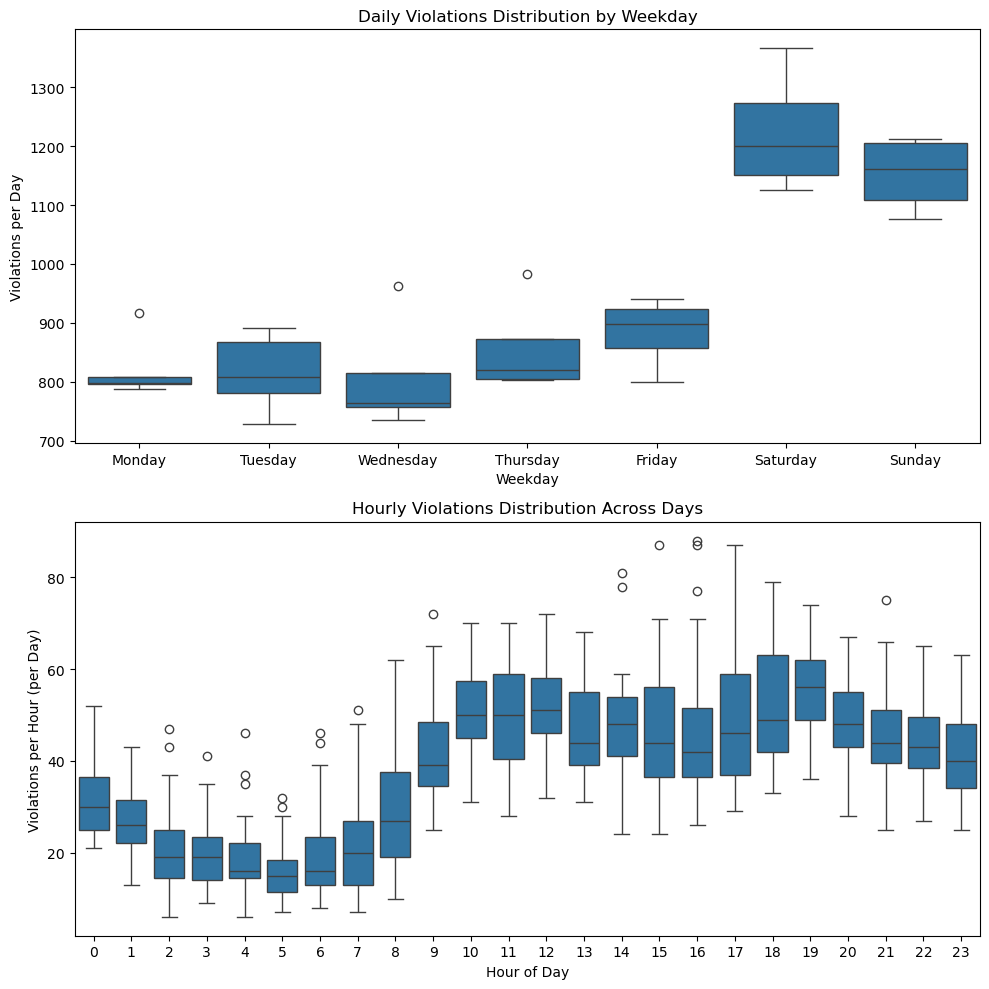

In [ ]:
# Task4:
daily = (
    speed
    .assign(date=speed["date_time"].dt.date)
    .groupby("date").size()
    .reset_index(name="count")
)
daily["weekday"] = pd.to_datetime(daily["date"]).dt.day_name()

hourly = (
    speed
    .assign(hour=speed["date_time"].dt.hour,
            date=speed["date_time"].dt.date)
    .groupby(["hour","date"])
    .size()
    .reset_index(name="count")
)

fig,( ,ax2) = plt.subplots(2,1,figsize=(10,10))
sns.boxplot(
    data=daily,
    x="weekday",
    y="count",
    ax=ax1
)
ax1.set_title("Daily Violations Distribution by Weekday")
ax1.set_xlabel("Weekday")
ax1.set_ylabel("Violations per Day")

sns.boxplot(
    data=hourly,
    x="hour",
    y="count",
    ax=ax2
)
ax2.set_title("Hourly Violations Distribution Across Days")
ax2.set_xlabel("Hour of Day")
ax2.set_ylabel("Violations per Hour (per Day)")

plt.tight_layout()
plt.show()

## 3. Predicting electricity demand

Last week, we used electricity load data from Pittsburgh to predict peak electricity demand based on temperature. Using the same dataset, put what you have learned together to predict average electricity demand (`AVG`) based on average temperature (`Avg_temp`) **for the summer months (June, July, August)**.

More specifically, do the following:
- Load and prepare the `df_summer` dataframe for analysis.
- Fit a linear regression by using the `scikit-learn` library for average temperature and average demand data.
- Plot the data and fitted line. Annotate your graph appropriately.
- Present relevant test metrics to quantify the __training__ loss.

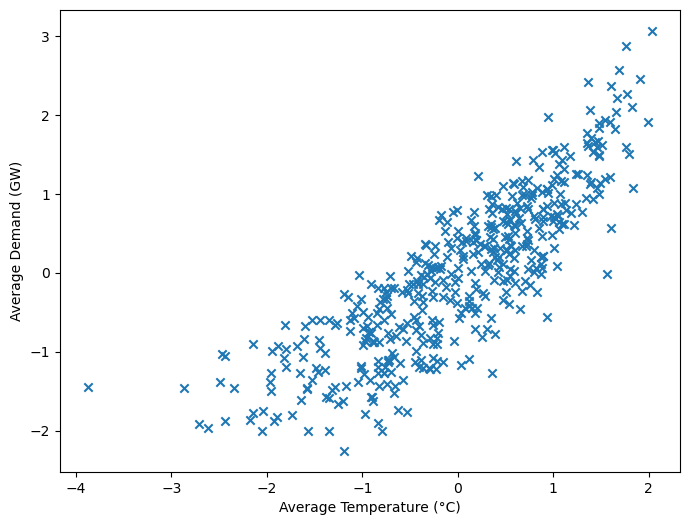

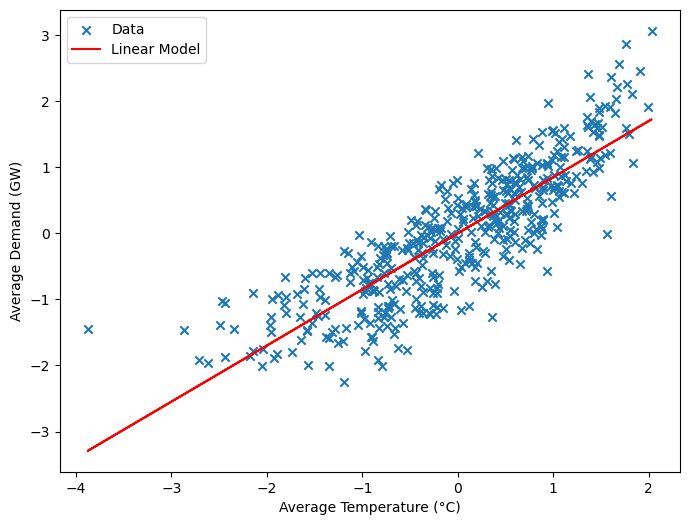

Mean Squared Error: 0.2789976064971874
Mean Absolute Error: 0.4288874475482797
R^2 Score: 0.7210023935028126


In [70]:
# your code here
pittsburgh = pd.read_csv("Pittsburgh_load_data.csv")
pittsburgh["Date"] = pd.to_datetime(pittsburgh["Date"], format="%d.%m.%Y")
pittsburgh["Month"] = pittsburgh["Date"].dt.month
df_summer = pittsburgh[(pittsburgh["Month"] == 6) | (pittsburgh["Month"] == 7) | (pittsburgh["Month"] == 8)]

# Visualisation 
xp = df_summer["Avg_temp"]
yp = df_summer["AVG"]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(xp.values.reshape(-1, 1))
Y_scaled = scaler.fit_transform(yp.values.reshape(-1, 1))

fig, ax = plt.subplots(figsize = (8,6))

ax.scatter(X_scaled, Y_scaled, marker='x')
ax.set_xlabel("Average Temperature (°C)")
ax.set_ylabel("Average Demand (GW)")
plt.show()

# Linear Model 
model = LinearRegression()
model.fit(X_scaled, Y_scaled)
y_pred = model.predict(X_scaled)
fig, ax = plt.subplots(figsize = (8,6))
ax.scatter(X_scaled, Y_scaled, marker='x', label="Data")
ax.plot(X_scaled, y_pred, color='red', label="Linear Model")
ax.set_xlabel("Average Temperature (°C)")
ax.set_ylabel("Average Demand (GW)")
ax.legend()
plt.show()

# Metrics 
from sklearn.metrics import mean_squared_error, mean_absolute_error ,r2_score
mse = mean_squared_error(Y_scaled, y_pred)
mae = mean_absolute_error(Y_scaled, y_pred)
r2 = r2_score(Y_scaled, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}") 

## 4. Introduction to advanced regression

This week, we will continue our regression journey and consider some more complex modeling techniques.

Let's once again use the familiar tips dataset from Seaborn. Execute the following cell to load the dataset.

In [71]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


During the introductory task to linear regression, we manually constructed a regression line to predict the tip based on the total bill using the following simple linear model:
\begin{equation}
\mathrm{tip} \approx \theta_1 \cdot \mathrm{total\_bill} + \theta_2
\end{equation}
where $\theta_1$ is the slope of the line and $\theta_2$ is the intercept term.

Implement the linear regression using scikit learn to find the optimal values for the parameters and plot the regression line on top of a scatter plot of the observed values.

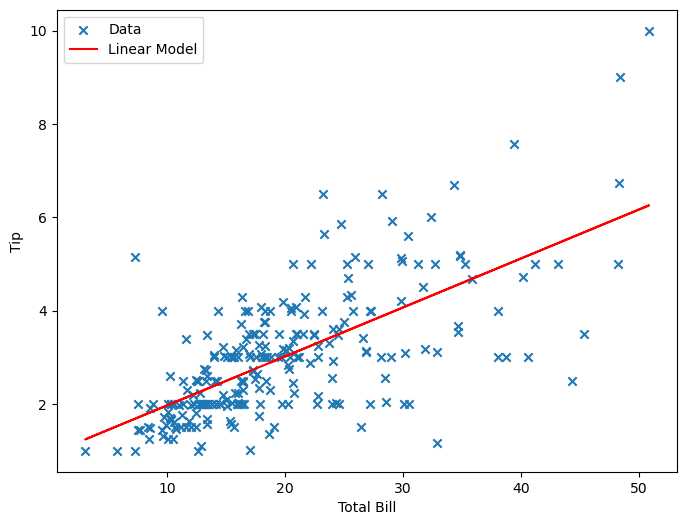

In [72]:
# your code here
model = LinearRegression()
X = tips[["total_bill"]]
y = tips["tip"]
model.fit(X, y)
y_pred = model.predict(X)
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, marker='x', label="Data")
ax.plot(X, y_pred, color='red', label="Linear Model")
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
ax.legend()
plt.show()

One obvious way to improve our predictions would be to add another feature. For example, are tips different when people eat for lunch compared to dinner? Add the `time` feature to your regression by doing the following:
- Recode the `time` feature so that "Lunch" is 0 and "Dinner" is 1.
- Define your feature matrix `X` to include both `total_bill` and `time_recoded`.
- Re-run your linear regression.
- Plot a scatter plot with the observed lunch tips and dinner tips in different colors, as well as the respective regression lines.

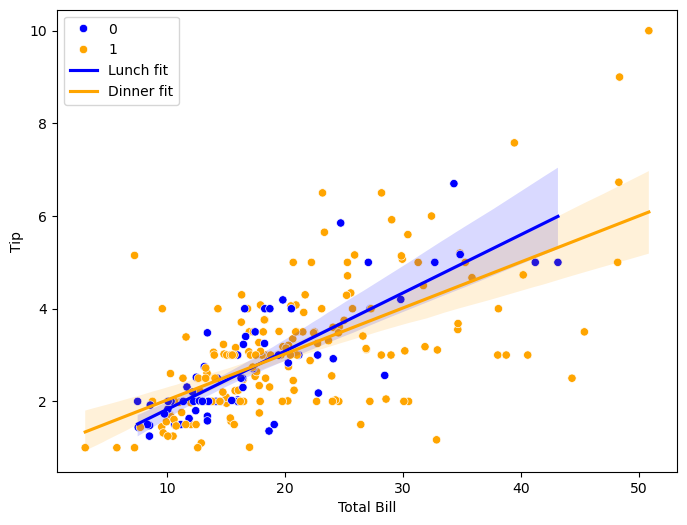

In [73]:
# your code here
tips["meal_time"] = tips["time"].map({'Lunch': 0, 'Dinner': 1})
X = tips[["total_bill", "meal_time"]]
y = tips["tip"]
model = LinearRegression()
model.fit(X, y)

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=tips, x="total_bill", y="tip", hue="meal_time", palette={0: "blue", 1: "orange"}, ax=ax)
sns.regplot(
    data=tips[tips.meal_time==0],
    x="total_bill",
    y="tip",
    scatter=False,
    ax=ax,
    color="blue",
    label="Lunch fit"
)
sns.regplot(
    data=tips[tips.meal_time==1],
    x="total_bill",
    y="tip",
    scatter=False,
    ax=ax,
    color="orange",
    label="Dinner fit"
)
ax.set_xlabel("Total Bill")
ax.set_ylabel("Tip")
ax.legend()
plt.show()

What do you think? Is it useful to add this feature?